<a href="https://colab.research.google.com/github/dekoska/machine-learning-bootcamp/blob/main/supervised/02_regression/05_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)

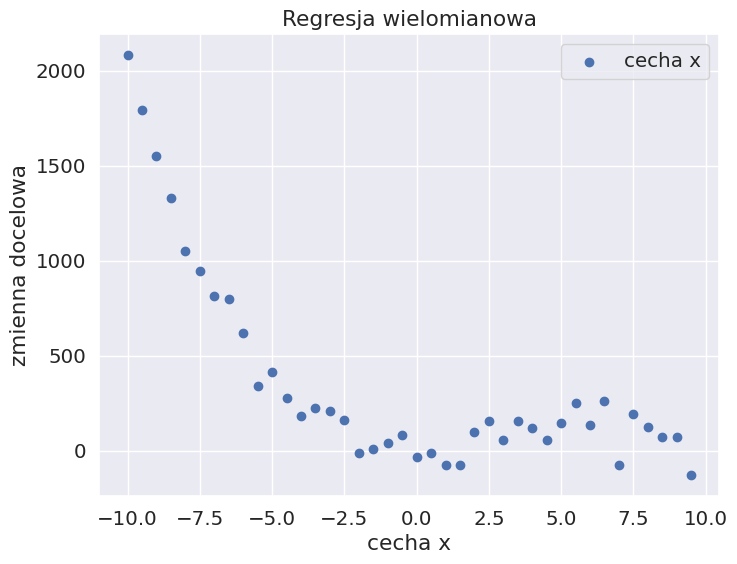

In [6]:
x = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -x**3 + 10*x**2 - 2*x + 3 + noise
x = x.reshape(40, 1)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x, y, label='cecha x')
plt.legend()
plt.show()

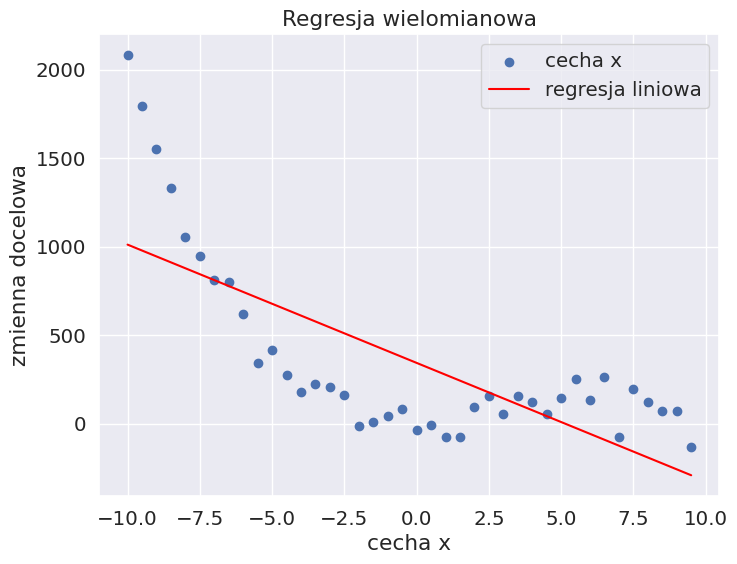

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x, y)
y_pred_lin = regressor.predict(x)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x, y, label='cecha x')
plt.plot(x, y_pred_lin, c='red', label='regresja liniowa')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

0.5359971266495305

In [11]:
df = pd.DataFrame(data={'x':x.ravel()})
df.head(10)

,x
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0
5,-7.5
6,-7.0
7,-6.5
8,-6.0
9,-5.5


In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
x_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [13]:
df = pd.DataFrame(data=x_poly)
df.columns = ['1', 'x', 'x^2']
df.head(10)

,1,x,x^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00
5,1.0,-7.5,56.25
6,1.0,-7.0,49.00
7,1.0,-6.5,42.25
8,1.0,-6.0,36.00
9,1.0,-5.5,30.25


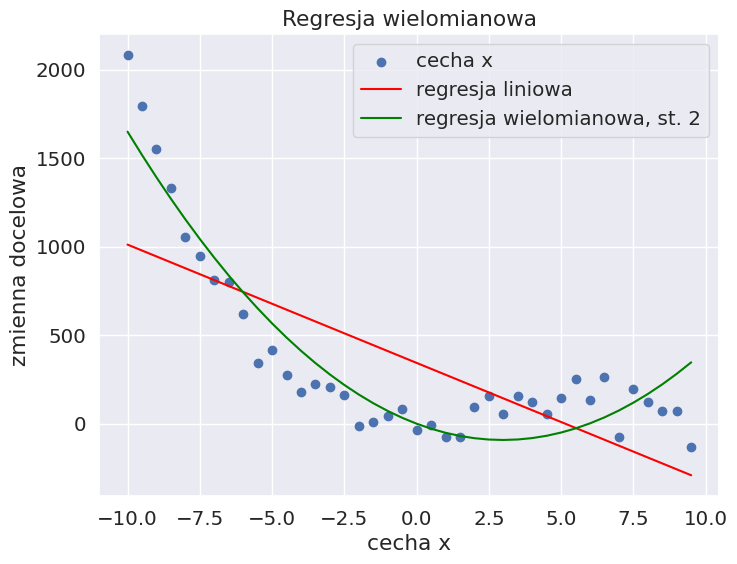

In [16]:
regressor_poly = LinearRegression()
regressor_poly.fit(x_poly, y)
y_pred_poly2 = regressor_poly.predict(x_poly)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x, y, label='cecha x')
plt.plot(x, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(x, y_pred_poly2, c='green', label='regresja wielomianowa, st. 2')
plt.legend()
plt.show()

In [22]:
r2_score(y, y_pred_poly2)

0.8767295487589822

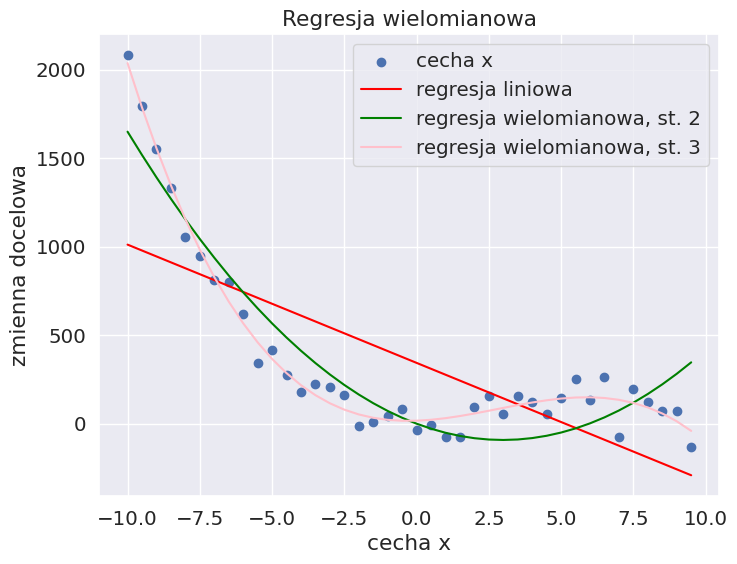

In [23]:
poly3 = PolynomialFeatures(degree=3)
x_poly3=poly3.fit_transform(x)

regressor_poly3 = LinearRegression()
regressor_poly3.fit(x_poly3, y)
y_pred_poly3 = regressor_poly3.predict(x_poly3)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x, y, label='cecha x')
plt.plot(x, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(x, y_pred_poly2, c='green', label='regresja wielomianowa, st. 2')
plt.plot(x, y_pred_poly3, c='pink', label='regresja wielomianowa, st. 3')
plt.legend()
plt.show()

In [24]:
r2_score(y, y_pred_poly3)

0.9810447936389942